# Permケース

In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import sklearn.linear_model as lm
import matplotlib.colors as colors

%matplotlib inline

# Grid
* NX=160, NY=269 (=43,040)
* 1grid =50m
* 8000m, 13450m
* 26246ft, 44127 ft

In [12]:
NX=160
NY=269
Xmeter=NX*50
Ymeter=NY*50
Xfeet=NX*50*3.28084
Yfeet=NY*50*3.28084
print (Xmeter, Ymeter, Xfeet, Yfeet)

8000 13450 26246.72 44127.298


In [13]:
softori=pd.read_csv(r'soft\rotsoft_all_eye2.txt')
poro=pd.read_csv(r'poro_all_seed690169.txt')
perm=pd.read_csv(r'permI_all_seed690169.txt')

In [14]:
perm.head(3)

,PERMI ALL
0,23.120554
1,24.141319
2,24.030001


In [15]:
POR=pd.DataFrame({
        'poro': poro['POR ALL'],
        'z': poro.index//(160*269)+1
    })

PERM=pd.DataFrame({
        'perm': perm['PERMI ALL'],
        'z': perm.index//(160*269)+1
    })

# Gross thickness

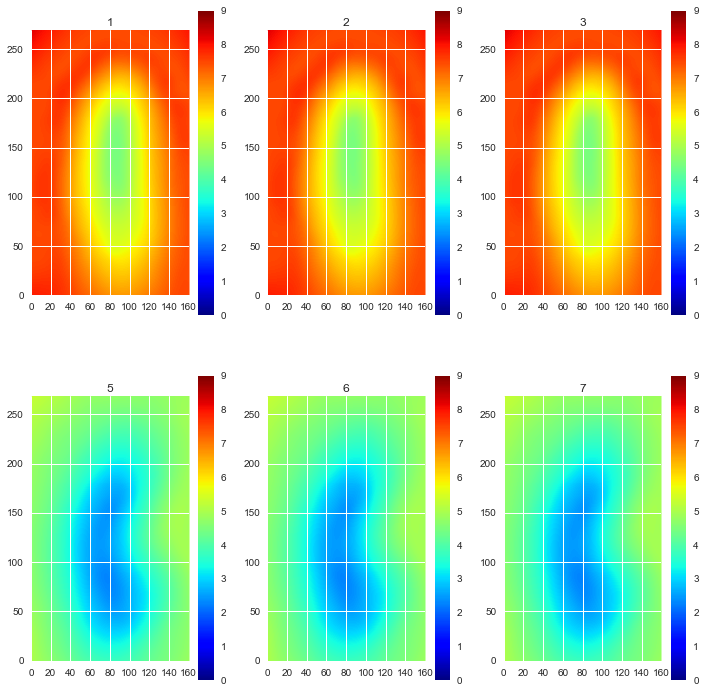

In [16]:
plt.figure(figsize=(12,12))
for n, g in zip([231, 232, 233, 234, 235, 236], [1, 2, 3, 5, 6, 7]):
    plt.subplot(n)
    graph=softori[softori.z==g].thickness.reshape(NY,NX)

    plt.imshow(graph, interpolation='nearest', cmap='jet', vmin = 0.0, vmax = 9)
    plt.xlim(0,NX)
    plt.ylim(0,NY)    
    plt.colorbar()
    plt.title(g)

In [17]:
with open("NGR-non-normal.txt", "r") as f:
    a = f.read().split(' ')

b=pd.Series(a)
c=pd.DataFrame({
        'ngr':pd.to_numeric(b, errors='coerce')       
    })
NGR=c[c.ngr>=0].reset_index(drop=True)
NGR=NGR.assign(
    z=NGR.index//(160*269)+1,
)

# NGR

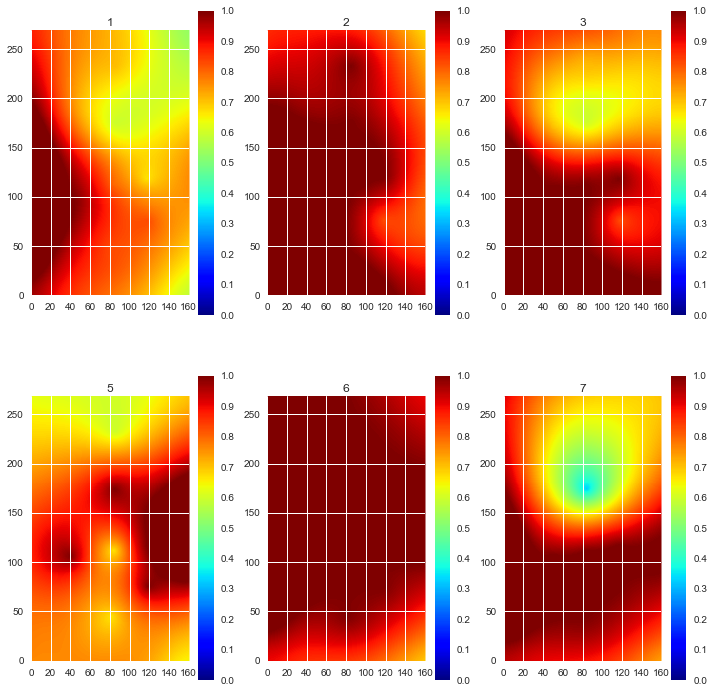

In [18]:
plt.figure(figsize=(12,12))
for n, g in zip([231, 232, 233, 234, 235, 236], [1, 2, 3, 5, 6, 7]): 
    plt.subplot(n)
    graph=NGR[NGR.z==g].ngr.reshape(NY,NX)
    plt.imshow(graph, interpolation='nearest', cmap='jet', vmin = 0.0, vmax = 1.0)
        
    plt.xlim(0,NX)
    plt.ylim(0,NY)    
    plt.colorbar()
    plt.title(g)

# D, E平均

$$
\begin{align}
\phi_{ave} = \frac{\sum h \cdot NGR \cdot \phi}{\sum h \cdot NGR}
\end{align}
$$

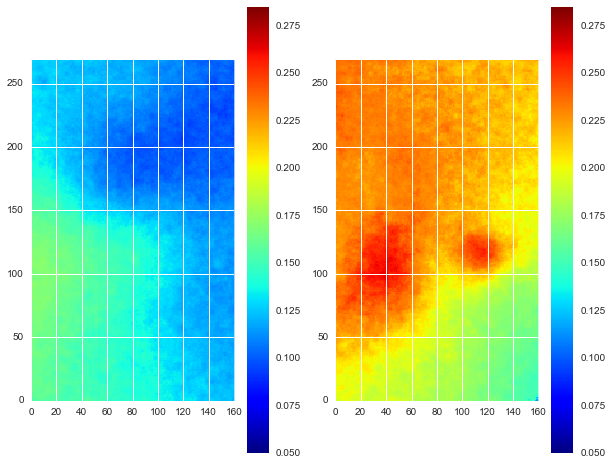

In [19]:
plt.figure(figsize=(10,8))
for n, g in zip([121, 122], [1, 5]):
    plt.subplot(n)
    gs1=softori[softori.z==g].thickness.reset_index(drop=True)
    gs2=softori[softori.z==g+1].thickness.reset_index(drop=True)
    gs3=softori[softori.z==g+2].thickness.reset_index(drop=True)
    
    ngr1=NGR[NGR.z==g].ngr.reset_index(drop=True)
    ngr2=NGR[NGR.z==g+1].ngr.reset_index(drop=True)
    ngr3=NGR[NGR.z==g+2].ngr.reset_index(drop=True)
        
    p1=POR[POR.z==g].poro.reset_index(drop=True)
    p2=POR[POR.z==g+1].poro.reset_index(drop=True)
    p3=POR[POR.z==g+2].poro.reset_index(drop=True)
    
    
    graph=(gs1*ngr1*p1 + gs2*ngr2*p2 + gs3*ngr3*p3)/(gs1*ngr1 + gs2*ngr2 + gs3*ngr3)
    graph=graph.reshape(NY,NX)

    plt.imshow(graph, interpolation='nearest', cmap='jet', vmin = 0.05, vmax = 0.285)
    plt.xlim(0,NX)
    plt.ylim(0,NY)    
    plt.colorbar()
    #plt.title(g)
    
#plt.savefig('DEPORO.PNG')    

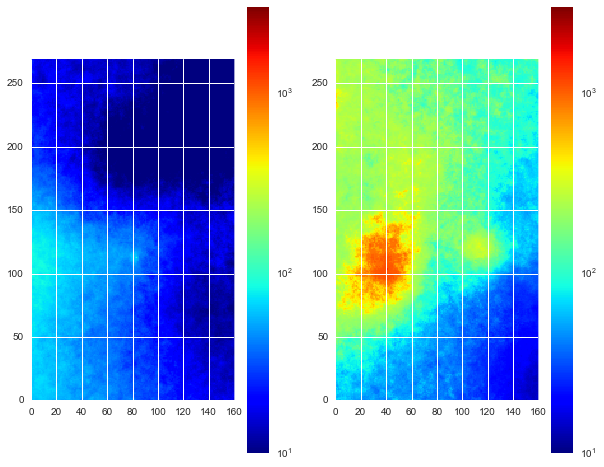

In [20]:
plt.figure(figsize=(10,8))
for n, g in zip([121, 122], [1, 5]):
    plt.subplot(n)
    gs1=softori[softori.z==g].thickness.reset_index(drop=True)
    gs2=softori[softori.z==g+1].thickness.reset_index(drop=True)
    gs3=softori[softori.z==g+2].thickness.reset_index(drop=True)
    
    ngr1=NGR[NGR.z==g].ngr.reset_index(drop=True)
    ngr2=NGR[NGR.z==g+1].ngr.reset_index(drop=True)
    ngr3=NGR[NGR.z==g+2].ngr.reset_index(drop=True)
        
    p1=PERM[PERM.z==g].perm.reset_index(drop=True)
    p2=PERM[PERM.z==g+1].perm.reset_index(drop=True)
    p3=PERM[PERM.z==g+2].perm.reset_index(drop=True)
    
    
    graph=(gs1*ngr1*p1 + gs2*ngr2*p2 + gs3*ngr3*p3)/(gs1*ngr1 + gs2*ngr2 + gs3*ngr3)
    graph=graph.reshape(NY,NX)

    #plt.imshow(graph, interpolation='nearest', cmap='jet')#, vmin = 0.05, vmax = 0.285)
    plt.imshow(graph, interpolation='nearest', cmap='jet', norm=colors.LogNorm(vmin=10, vmax=3000))
    plt.xlim(0,NX)
    plt.ylim(0,NY)    
    plt.colorbar()
    #plt.title(g)
    
#plt.savefig('DEPERM.PNG')    